In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from photoz_utils import *
from bias_utils import *

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
# 1-1-1-1 Stratified
bayesian_1111 = pd.read_csv('/data/HSC/3_model_comparison/bayesian_predictions_1_[1, 1, 1, 1]_v2.csv')
ensemble_1111 = pd.read_csv('/data/HSC/3_model_comparison/ensemble_predictions_1_[1, 1, 1, 1]_v2.csv')
rf_1111 = pd.read_csv('/data/HSC/3_model_comparison/random_forest_predictions_1_[1, 1, 1, 1]_v2.csv')

ensemble_1111.drop(columns=['Unnamed: 0'], inplace=True)
bayesian_1111.drop(columns=['Unnamed: 0'], inplace=True)
rf_1111.drop(columns=['Unnamed: 0'], inplace=True)

ensemble_pred_1111 = ensemble_1111['predicted_redshift']
bayesian_pred_1111 = bayesian_1111['predicted_redshift']
rf_pred_1111 = rf_1111['predicted_redshift']

In [3]:
# Control
bayesian_ctrl = pd.read_csv('/mnt/data/HSC/3_model_comparison/bayesian_predictions_1_control_v2.csv')
ensemble_ctrl = pd.read_csv('/mnt/data/HSC/3_model_comparison/ensemble_predictions_1_control_v2.csv')
rf_ctrl = pd.read_csv('/data/HSC/3_model_comparison/random_forest_predictions_1_control_v2.csv')

ensemble_ctrl.drop(columns=['Unnamed: 0'], inplace=True)
bayesian_ctrl.drop(columns=['Unnamed: 0'], inplace=True)
rf_ctrl.drop(columns=['Unnamed: 0'], inplace=True)

ensemble_pred_ctrl = ensemble_ctrl['predicted_redshift']
bayesian_pred_ctrl = bayesian_ctrl['predicted_redshift']
rf_pred_ctrl = rf_ctrl['predicted_redshift']

In [4]:
ensemble_true = ensemble_1111['specz_redshift'] # they all have the same one
bayesian_true = bayesian_1111['specz_redshift']
rf_true = rf_1111['specz_redshift']

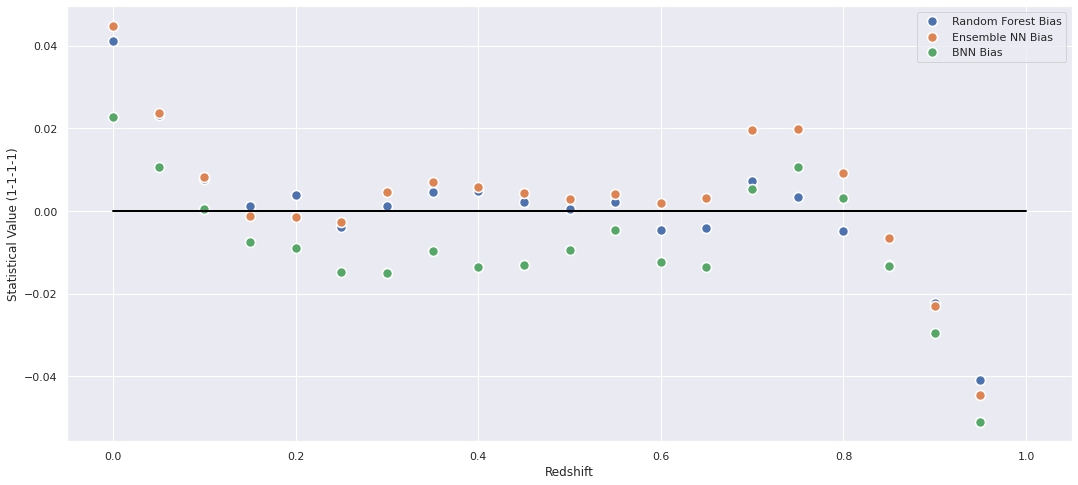

In [5]:
bias_rf_1111 = get_bias(rf_true, rf_pred_1111, 1)
bias_ensemble_1111 = get_bias(ensemble_true, ensemble_pred_1111, 1)
bias_bayesian_1111 = get_bias(bayesian_true, bayesian_pred_1111, 1)

plot_bias([bias_rf_1111, bias_ensemble_1111, bias_bayesian_1111], ['Random Forest Bias', 'Ensemble NN Bias', 'BNN Bias'], 'Statistical Value (1-1-1-1)', 1)

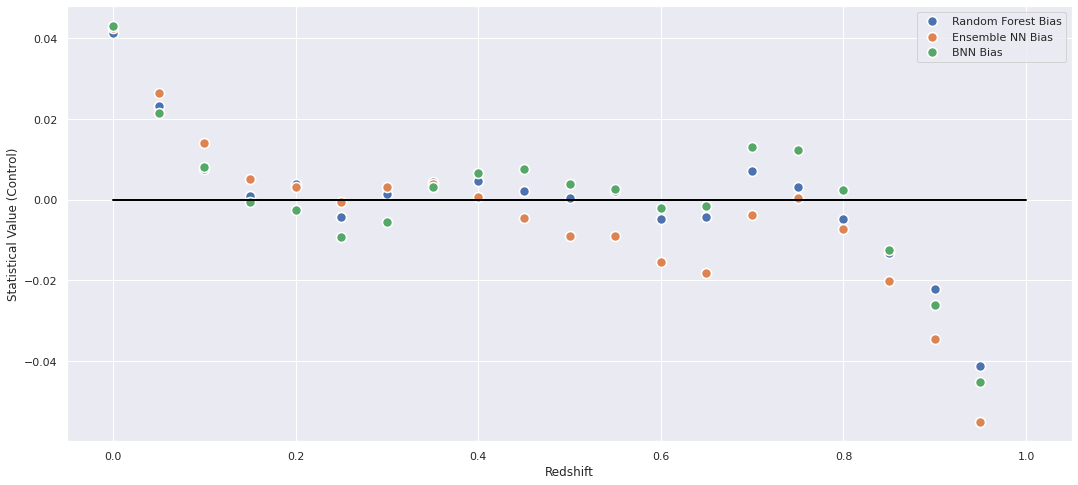

In [6]:
bias_rf_ctrl = get_bias(rf_true, rf_pred_ctrl, 1)
bias_ensemble_ctrl = get_bias(ensemble_true, ensemble_pred_ctrl, 1)
bias_bayesian_ctrl = get_bias(bayesian_true, bayesian_pred_ctrl, 1)

plot_bias([bias_rf_ctrl, bias_ensemble_ctrl, bias_bayesian_ctrl], ['Random Forest Bias', 'Ensemble NN Bias', 'BNN Bias'], 'Statistical Value (Control)', 1)

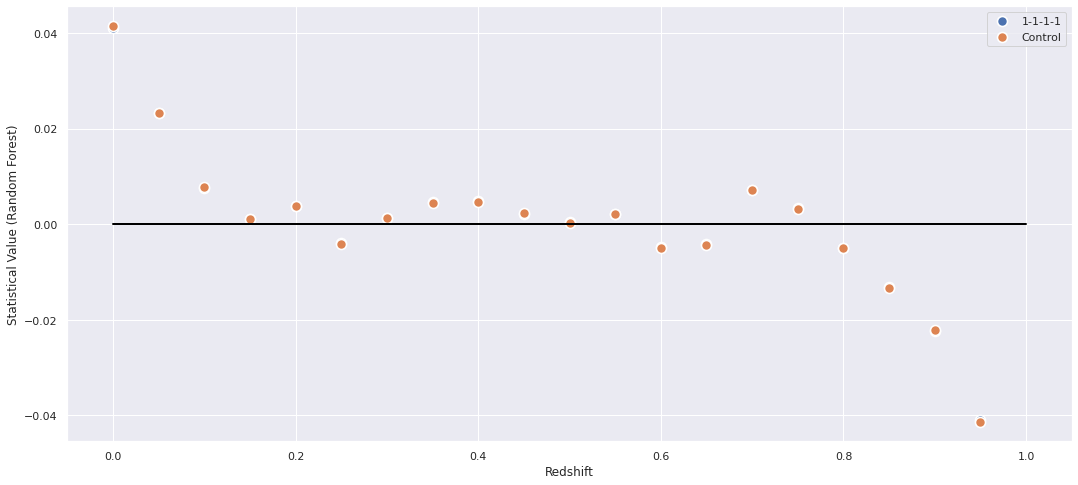

In [7]:
plot_bias([bias_rf_1111, bias_rf_ctrl], ['1-1-1-1', 'Control'], 'Statistical Value (Random Forest)', 1)

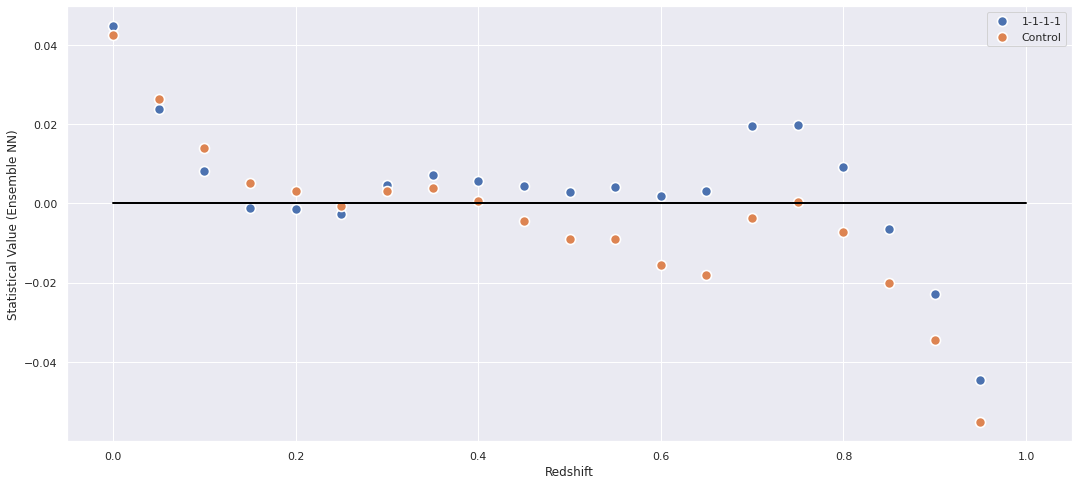

In [8]:
plot_bias([bias_ensemble_1111, bias_ensemble_ctrl], ['1-1-1-1', 'Control'], 'Statistical Value (Ensemble NN)', 1)

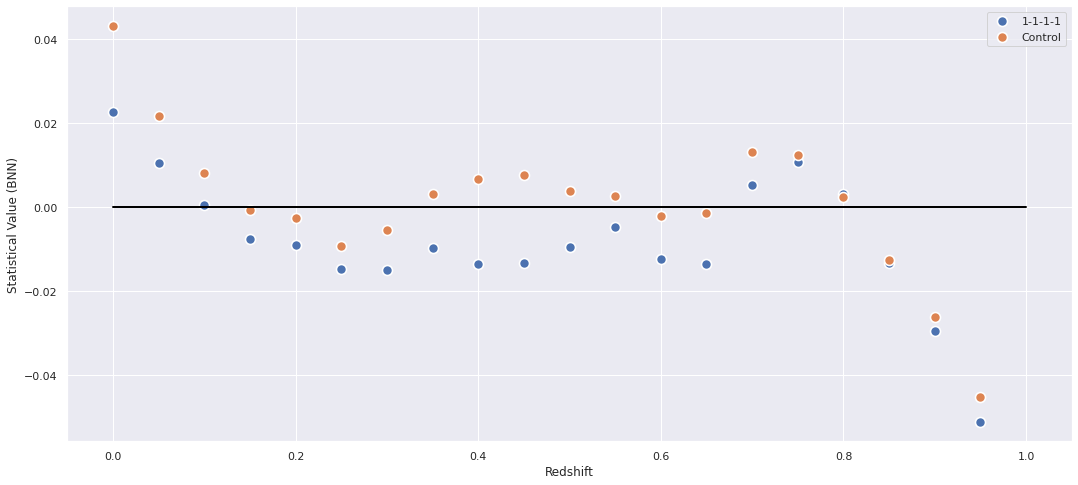

In [9]:
plot_bias([bias_bayesian_1111, bias_bayesian_ctrl], ['1-1-1-1', 'Control'], 'Statistical Value (BNN)', 1)